In [1]:
#PyTorch Workflow
import torch 
from torch import nn #nn contains all of PyTorch's neural network building blocks
import matplotlib.pyplot as plt

#check PyTorch version

torch.__version__

'2.0.0'

## 1.DATA PREPARING AND LOADING
Data can be almost anything

In [2]:
#Create *known* parameters , linear regression to make straight line
weight=0.7
bias=0.3 
#create 
start=0
end = 1
step=0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y=weight * X + bias

X[:10],y[:10],len(X),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [3]:
#splitting data into training and test sets.
train_split = int(0.8*len(X))
X_train ,y_train = X[:train_split],y[:train_split]
X_test, y_test = X[train_split:],y[train_split:]

len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [4]:
#How can we visualize our data?

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    plt.figure(figsize=(10,7))

    #plot training data in blue
    plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
    #plot testing data in green
    plt.scatter(test_data,test_labels,c="g",s=4,label="Testing Data")
    #Are there predictions?
    if predictions is not None:
        #plot predicitions if they exist
        plt.scatter(test_data,predictions,c="r",label="Predictions")

    #show the legend
    plt.legend(prop={"size": 14})

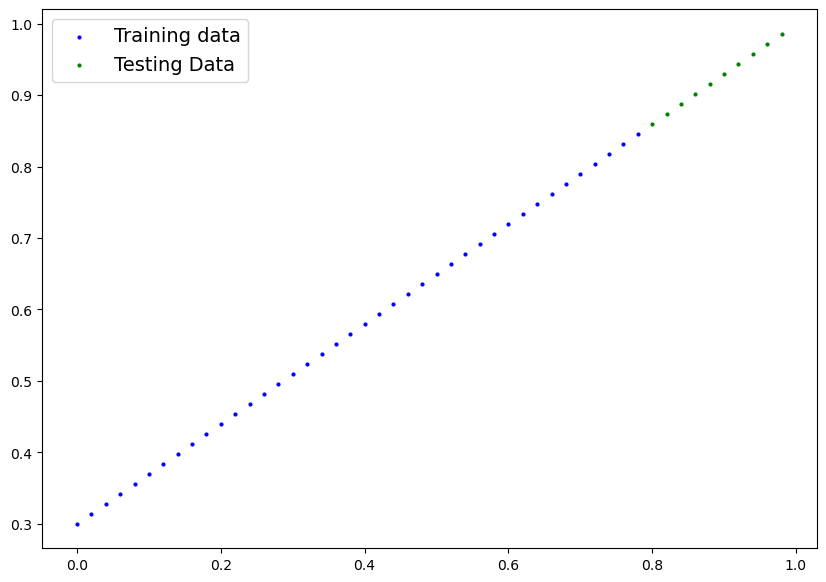

In [5]:
plot_predictions()

In [6]:
#Build first model

In [7]:
class LinearRegressionModel(nn.Module): # almost everything in PyTorch inherits from nn.module
    def __init__(self):
        super().__init__()
        self.weights=nn.Parameter(torch.randn(1,
                                              requires_grad=True,
                                              dtype=torch.float))
        self.bias=nn.Parameter(torch.randn(1,
                                           requires_grad=True,
                                           dtype=torch.float))
        
        #forward method to define the computation in the model

    def forward(self,x:torch.Tensor) ->torch.Tensor: #"x" is the input data
        return self.weights * x + self.bias

In [8]:
#Checking contents of the model
#Create a random seed
torch.manual_seed(42)

# Create an instance of the model(this is a subclass of nn.module)

model_0 = LinearRegressionModel()

#Check the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [9]:
# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [10]:
model_0.weights,model_0.bias,weight,bias

(Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True),
 0.7,
 0.3)

In [11]:
#MAKE PREDICTIONS WITH MODEL,inference mode is faster
with torch.inference_mode():
    y_preds=model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

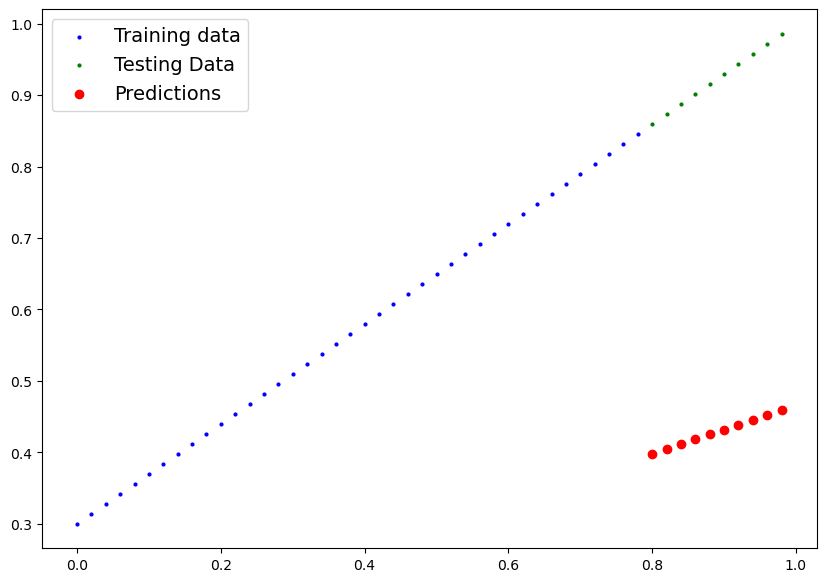

In [12]:
plot_predictions(predictions=y_preds)

In [13]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01) #lr = learning rate

In [14]:
loss_fn,optimizer

(L1Loss(),
 SGD (
 Parameter Group 0
     dampening: 0
     differentiable: False
     foreach: None
     lr: 0.01
     maximize: False
     momentum: 0
     nesterov: False
     weight_decay: 0
 ))

### Building a training loop ( and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forwards pass (this involves data moving thour or model's 'forward()' function)
2. Calcualte the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss backward -- move backwards through the network to calculate the gradient
5. Optimizer step

In [15]:
torch.manual_seed(42)
# An epoch is one loop through the data
epochs = 200

#Track different values
epoch_count =[]
loss_values= []
test_loss_values = []

#0.Loop through the data
for epoch in range(epochs):
    #set the model in to training mode
    model_0.train()  #train mode in PyTorch sets all parameters that require gradients to require gradients
    
    #1. Forward pass
    y_pred = model_0(X_train)

    #2. Calculate the loss
    loss=loss_fn(y_pred,y_train)
    
    #3. Optimizer zero grad
    optimizer.zero_grad()
    
    #4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    #5. Step the optimizer (perform gradient descent)
    optimizer.step()

    model_0.eval()   #turns off gradient tracking
    with torch.inference_mode():
        #1. Do the forward pass
        test_pred=model_0(X_test)

        #2. Calculate the loss
        test_loss=loss_fn(test_pred,y_test)
        
    if epoch % 10 ==0:
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss_values)
        print(f"Epoch:{epoch} | Loss:{loss} | Test loss: {test_loss}")
        print(model_0.state_dict())
  



Epoch:0 | Loss:0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch:10 | Loss:0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch:20 | Loss:0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch:30 | Loss:0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch:40 | Loss:0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch:50 | Loss:0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch:60 | Loss:0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
Epoch:70

In [16]:
import numpy as np

np.array(torch.tensor(loss_values).cpu().numpy()),test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [[...],
  [...],
  [...],
  [...],
  [...],
  [...],
  [...],
  [...],
  [...],
  [...],
  [...],
  [...],
  [...],
  [...],
  [...],
  [...],
  [...],
  [...],
  [...],
  [...]])

In [17]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count,test_loss_values, label="Test Loss")
plt.title("Traininig and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
with torch.inference_mode():
    y_preds_new=model_0(X_test)
    

(None, None)

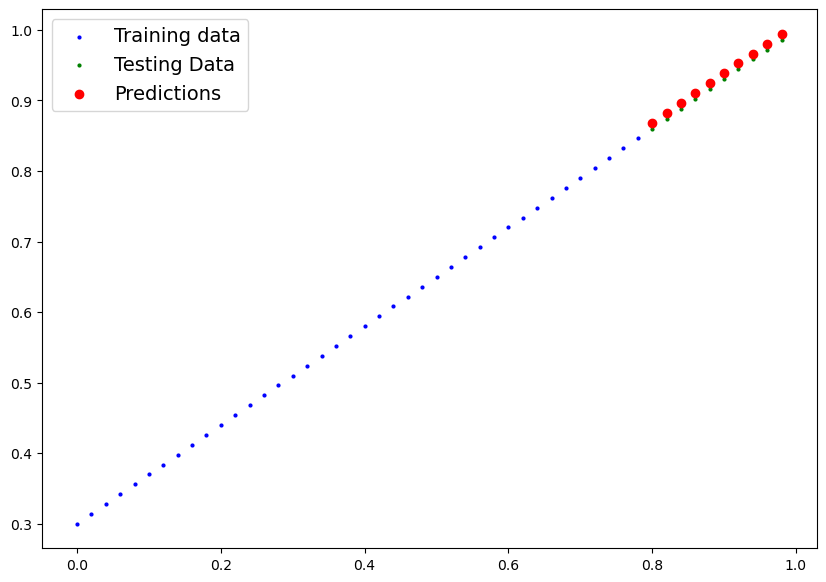

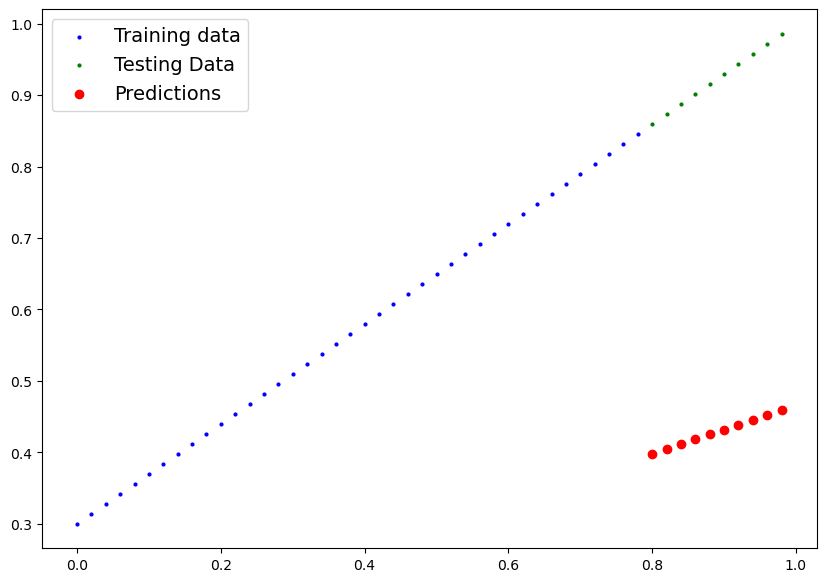

In [ ]:
plot_predictions(predictions=y_preds_new),plot_predictions(predictions=y_preds)